# Basic EDA for Chest Xray Dataset

## 1. Import Data

In [1]:
import pandas as pd
import heapq
import matplotlib.pyplot as plt

df = pd.read_csv("../../../data/Chest/Data_Entry_2017.csv")
print(f"Dataframe with shape len {df.shape[0]} and with {df.shape[1]}")
df

Dataframe with shape len 112120 and with 12


,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
0,00000001_000.png,Cardiomegaly,0,1,58,M,PA,2682,2749,0.143,0.143,NaN
1,00000001_001.png,Cardiomegaly|Emphysema,1,1,58,M,PA,2894,2729,0.143,0.143,NaN
2,00000001_002.png,Cardiomegaly|Effusion,2,1,58,M,PA,2500,2048,0.168,0.168,NaN
3,00000002_000.png,No Finding,0,2,81,M,PA,2500,2048,0.171,0.171,NaN
4,00000003_000.png,Hernia,0,3,81,F,PA,2582,2991,0.143,0.143,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
112115,00030801_001.png,Mass|Pneumonia,1,30801,39,M,PA,2048,2500,0.168,0.168,NaN
112116,00030802_000.png,No Finding,0,30802,29,M,PA,2048,2500,0.168,0.168,NaN
112117,00030803_000.png,No Finding,0,30803,42,F,PA,2048,2500,0.168,0.168,NaN
112118,00030804_000.png,No Finding,0,30804,30,F,PA,2048,2500,0.168,0.168,NaN


## 2. Looking at the attributes

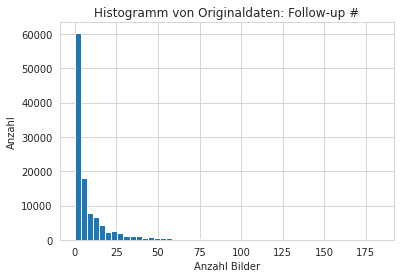

<Figure size 720x504 with 0 Axes>

,Follow-up #,Patient ID,Patient Age,OriginalImage[Width,Height],OriginalImagePixelSpacing[x,y],Unnamed: 11
count,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,112120.000000,0.0
mean,8.573751,14346.381743,46.901463,2646.078844,2486.438842,0.155649,0.155649,NaN
std,15.406320,8403.876972,16.839923,341.246429,401.268227,0.016174,0.016174,NaN
min,0.000000,1.000000,1.000000,1143.000000,966.000000,0.115000,0.115000,NaN
25%,0.000000,7310.750000,35.000000,2500.000000,2048.000000,0.143000,0.143000,NaN
50%,3.000000,13993.000000,49.000000,2518.000000,2544.000000,0.143000,0.143000,NaN
75%,10.000000,20673.000000,59.000000,2992.000000,2991.000000,0.168000,0.168000,NaN
max,183.000000,30805.000000,414.000000,3827.000000,4715.000000,0.198800,0.198800,NaN


In [2]:
# data of the Patinen Age is not corrtect
df["Follow-up #"].sort_values().hist(bins=50)
plt.title("Histogramm von Originaldaten: Follow-up #")
plt.ylabel("Anzahl")
plt.xlabel("Anzahl Bilder")
fig = plt.figure(figsize =(10, 7))
plt.show()
df.describe()

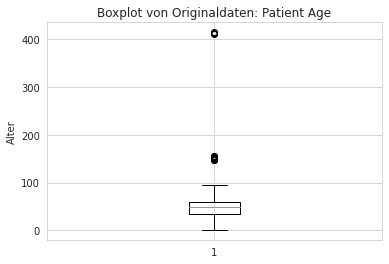

<Figure size 720x504 with 0 Axes>

In [3]:
plt.boxplot(df["Patient Age"])
plt.title("Boxplot von Originaldaten: Patient Age")
plt.ylabel("Alter")
plt.xlabel("")
fig = plt.figure(figsize =(10, 7))
plt.show()

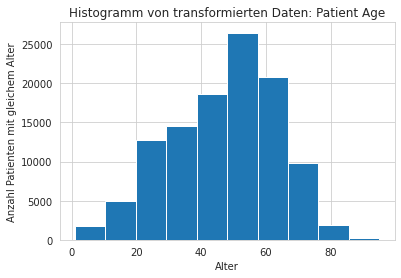

<Figure size 720x504 with 0 Axes>

In [4]:
df_age = sorted(df[df["Patient Age"]<=119]["Patient Age"],reverse=True)
plt.hist(df_age)
plt.title("Histogramm von transformierten Daten: Patient Age")
plt.ylabel("Anzahl Patienten mit gleichem Alter")
plt.xlabel("Alter")
fig = plt.figure(figsize =(10, 7))
plt.show()

There are 6 Patient who are over 400 years old, and another 10 are around 150 years old. The should be removed for further investigations.

## Label Encoder


In [5]:
#remove all data with more than one observation
df["labels"] = df["Finding Labels"].str.split("|").map(lambda x:len(x))

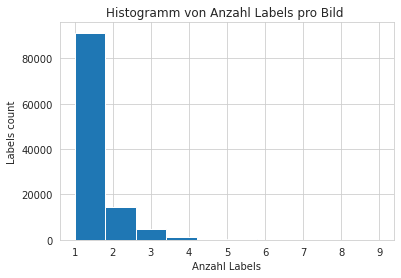

In [6]:
plt.hist(df["labels"])
plt.title("Histogramm von Anzahl Labels pro Bild ")
plt.ylabel("Labels count")
plt.xlabel("Anzahl Labels")
#fig = plt.figure(figsize =(10, 7))
plt.show()

In [7]:
print("There are ",len(df[df["labels"]==1])/len(df)*100,"% with Labelscount = 0")
df1 = df.copy()
df1 = df1[df1["labels"]==1]

There are  81.45201569746699 % with Labelscount = 0


#### Label Encoding

In [8]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df1["labels_encoded"] = ord_enc.fit_transform(df1[["Finding Labels"]])

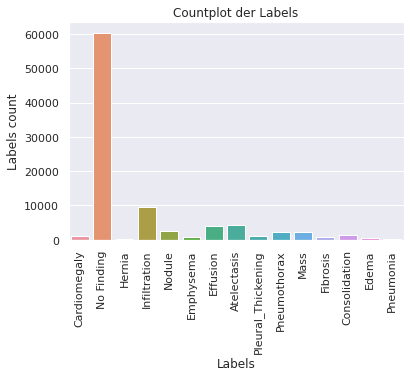

In [9]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Finding Labels", data=df1)
ax.tick_params(axis='x', rotation=90)
plt.title("Countplot der Labels")
plt.ylabel("Labels count")
plt.xlabel("Labels")
plt.show()

In [10]:
print("There are ",len(df1[df1["labels_encoded"]==10])/len(df1)*100,"% with Labels = No Finding")

There are  66.0954404099689 % with Labels = No Finding
